2023-05-03 09:36:07.986003: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-03 09:36:08.741513: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-05-03 09:36:08.741551: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-05-03 09:36:10.547229: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

Epoch 1/10


2023-05-03 09:36:13.948396: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 7s 3ms/step - loss: 0.4970 - accuracy: 0.8257
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3738 - accuracy: 0.8651
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3361 - accuracy: 0.8779
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3104 - accuracy: 0.8865
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2941 - accuracy: 0.8913
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2796 - accuracy: 0.8967
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2659 - accuracy: 0.9018
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2542 - accuracy: 0.9056
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2449 - accuracy: 0.9080
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2377 - accura

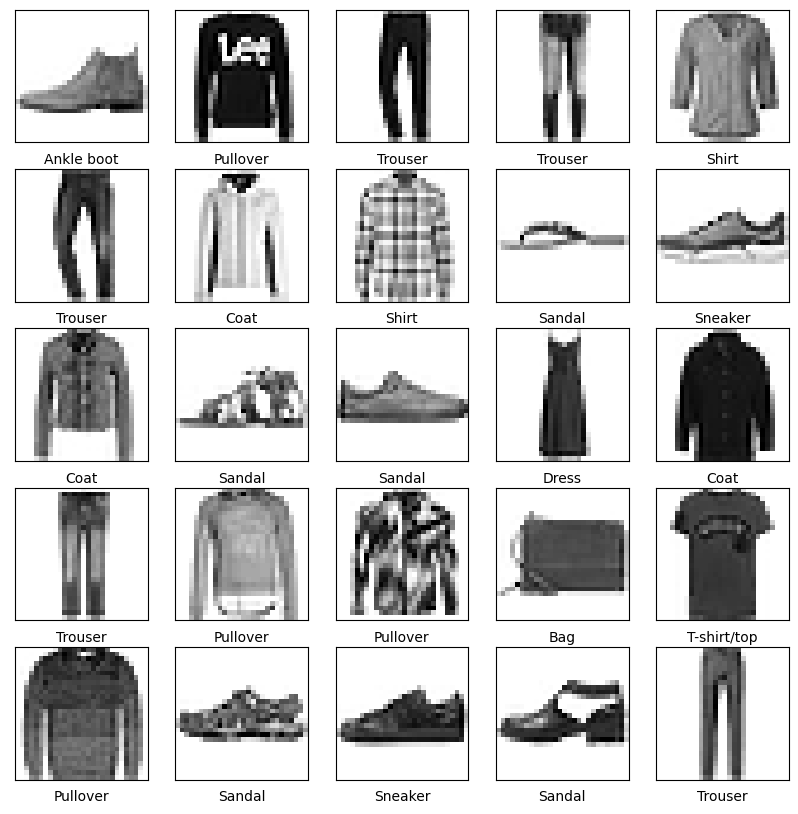

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Define the class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Preprocess the data
x_train = x_train / 255.0
x_test = x_test / 255.0

# Define the model architecture
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

# Make predictions
predictions = model.predict(x_test)

# Plot the results
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[np.argmax(predictions[i])])
    plt.xticks([])
    plt.yticks([])
plt.show()
